In [54]:
%reset -f

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:

import pandas as pd
data_path = "/content/drive/MyDrive/repo/cleaned_nfl.csv"
df= pd.read_csv(data_path)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        11231 non-null  object 
 1   schedule_season      11231 non-null  int64  
 2   schedule_week        11231 non-null  object 
 3   schedule_playoff     11231 non-null  bool   
 4   team_home            11231 non-null  object 
 5   score_home           11231 non-null  float64
 6   score_away           11231 non-null  float64
 7   team_away            11231 non-null  object 
 8   team_favorite_id     11231 non-null  object 
 9   spread_favorite      11231 non-null  float64
 10  over_under_line      11231 non-null  object 
 11  stadium              11231 non-null  object 
 12  stadium_neutral      11231 non-null  bool   
 13  weather_temperature  11231 non-null  float64
 14  weather_wind_mph     11231 non-null  float64
 15  weather_humidity     11231 non-null 

In [73]:
df['schedule_date'] = pd.to_datetime(df['schedule_date'], errors='coerce')

# Add new columns
df['schedule_year'] = df['schedule_date'].dt.year
df['schedule_month'] = df['schedule_date'].dt.month
df['schedule_day_week'] = df['schedule_date'].dt.weekday + 1  # Day of the week name
df['schedule_day_month'] = df['schedule_date'].dt.day



df.head()


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,team_favorite_name,schedule_year,schedule_month,schedule_day_week,schedule_day_month
0,1968-01-14,1967,Superbowl,True,Green Bay Packers,33.0,14.0,Oakland Raiders,GB,-13.5,...,Orange Bowl,True,60.0,12.0,74.0,Green Bay Packers,1968,1,7,14
1,1969-01-12,1968,Superbowl,True,Baltimore Colts,7.0,16.0,New York Jets,IND,-18.0,...,Orange Bowl,True,66.0,12.0,80.0,Baltimore Colts,1969,1,7,12
2,1970-01-11,1969,Superbowl,True,Kansas City Chiefs,23.0,7.0,Minnesota Vikings,MIN,-12.0,...,Tulane Stadium,True,55.0,14.0,84.0,Minnesota Vikings,1970,1,7,11
3,1971-01-17,1970,Superbowl,True,Baltimore Colts,16.0,13.0,Dallas Cowboys,IND,-2.5,...,Orange Bowl,True,59.0,11.0,60.0,Baltimore Colts,1971,1,7,17
4,1972-01-16,1971,Superbowl,True,Dallas Cowboys,24.0,3.0,Miami Dolphins,DAL,-6.0,...,Tulane Stadium,True,34.0,18.0,40.0,Dallas Cowboys,1972,1,7,16


In [74]:
# Drop specified columns
df = df.drop(columns=['schedule_date', 'schedule_season', 'schedule_week', 'schedule_playoff', 'team_favorite_id', 'stadium_neutral'] )




In [75]:
# Verify the remaining columns
df.head()

,team_home,score_home,score_away,team_away,spread_favorite,over_under_line,stadium,weather_temperature,weather_wind_mph,weather_humidity,team_favorite_name,schedule_year,schedule_month,schedule_day_week,schedule_day_month
0,Green Bay Packers,33.0,14.0,Oakland Raiders,-13.5,43,Orange Bowl,60.0,12.0,74.0,Green Bay Packers,1968,1,7,14
1,Baltimore Colts,7.0,16.0,New York Jets,-18.0,40,Orange Bowl,66.0,12.0,80.0,Baltimore Colts,1969,1,7,12
2,Kansas City Chiefs,23.0,7.0,Minnesota Vikings,-12.0,39,Tulane Stadium,55.0,14.0,84.0,Minnesota Vikings,1970,1,7,11
3,Baltimore Colts,16.0,13.0,Dallas Cowboys,-2.5,36,Orange Bowl,59.0,11.0,60.0,Baltimore Colts,1971,1,7,17
4,Dallas Cowboys,24.0,3.0,Miami Dolphins,-6.0,34,Tulane Stadium,34.0,18.0,40.0,Dallas Cowboys,1972,1,7,16


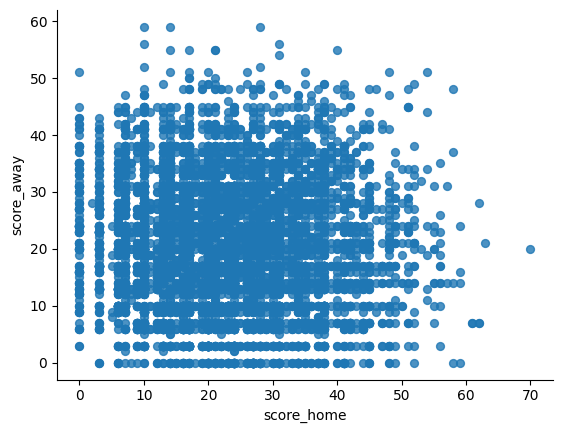

In [76]:
# @title score_home vs score_away

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='score_home', y='score_away', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)